# 🐶 Data Wrangling Project: WeRateDogs Analysis  
*Prepared by [Your Name]*  
*Date: [Submission Date]*  

---

## **📥 1. Gathering Data** 
**Data Sources:**  
1. **Twitter Archive (CSV):**  
   - Manually downloaded from Udacity.  
   - Contains tweet text, timestamps, ratings, and metadata.  

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. **Image Predictions (TSV):**  
   - Programmatically downloaded via `requests`.  
   - Includes AI predictions for dog breeds in images.  

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. **Tweet Engagement (JSON):**  
   - Extracted using Twitter API and `tweepy`.  
   - Provides retweet and favorite counts.  

In [4]:
tweet_data = []
with open('tweet-json', 'r') as f:
    for line in f:
        try:
            data = json.loads(line)
            tweet_data.append({
                'tweet_id': data['id'],
                'retweet_count': data['retweet_count'],
                'favorite_count': data['favorite_count']
            })
        except:
            continue

tweet_json = pd.DataFrame(tweet_data)

## **🔍 2. Assessing Data**

### **🛠️ Quality Issues Identified:**  
| #  | Issue Description                  | Example/Details                 |  
|----|------------------------------------|---------------------------------|  
| 1  | 181 retweets present               | `retweeted_status_id` not null  |  
| 2  | 23 invalid rating denominators     | Denominators ≠ 10              |  
| 3  | Invalid dog names (e.g., "a")      | Found 45 invalid names         |  
| 4  | Timestamp stored as string         | Needs datetime conversion       |  
| 5  | 59 tweets missing image URLs       | `expanded_urls` is null        |  
| 6  |invalid rating numerators Values exceeding 20 |  (e.g., 50/10) due to extraction errors.   | 
| 7  | 616 missing/invalid dog names Due to extraction errors   |    (e.g., "a", "such")            |     
| 8  | Missing dog names (`name` is NaN) | Over 500 rows missing names     |
### **📦 Tidiness Issues Identified:**  
- Dog stages split into 4 columns (`doggo`, `pupper`, etc.).  
- Data fragmented across 3 datasets.  

# --------------------------------------
# 🧹 Additional Quality Issue Fix
# Define: Invalid dog names like 'a', 'an', and 'the' are not actual names

In [5]:
# Code:
twitter_archive['name'] = twitter_archive['name'].replace(['a', 'an', 'the'], np.nan)

In [6]:
# Test:
print("Invalid dog names remaining:", twitter_archive['name'].str.lower().isin(['a', 'an', 'the']).sum())

Invalid dog names remaining: 0


In [7]:
twitter_archive.sample(3)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1541 non-null   object 
 13  doggo                       97 no

In [8]:
image_predictions.sample(3)
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_json.sample(3)
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [10]:
print("Retweets present:", twitter_archive.retweeted_status_id.notnull().sum())

Retweets present: 181


In [11]:
print("Invalid denominators:", twitter_archive[twitter_archive.rating_denominator != 10].shape[0])

Invalid denominators: 23


In [12]:
invalid_names = twitter_archive[twitter_archive.name.str.contains('^[a-z]', case=False, na=False)]
print("Invalid dog names:", invalid_names.name.unique())

Invalid dog names: ['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Canela'
 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles'
 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella'
 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'Elliot'
 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy' 'Steven' 'Beau'
 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed' 'Sebastian'
 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean'
 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey' 'Scout'
 'Gizmo' 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy' 'Meatball'
 'Paisley' 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave' 'Jersey'
 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'Winston'
 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie' 'Cermet' 

In [13]:
print("Timestamp data type:", twitter_archive.timestamp.dtype)

Timestamp data type: object


In [14]:
print("Duplicate tweets in images:", image_predictions.tweet_id.duplicated().sum())

Duplicate tweets in images: 0


In [15]:
common_ids = twitter_archive.tweet_id.isin(tweet_json.tweet_id)
print("Missing tweets in JSON:", twitter_archive[~common_ids].shape[0])

Missing tweets in JSON: 2


In [16]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive.timestamp)

In [17]:
print("Tweets without images:", twitter_archive[twitter_archive.expanded_urls.isnull()].shape[0])

Tweets without images: 59


## 3. Cleaning Data

### Issue 1: Missing Values in Critical Columns
**Define:** Replace missing values in critical columns with appropriate values or remove rows with missing critical data.
--- 
**Code:**

In [18]:
# Remove rows with missing critical data
twitter_archive = twitter_archive.dropna(subset=['rating_numerator', 'rating_denominator'])

**Test:**

In [19]:
print("Missing values in critical columns after cleaning:")
print(twitter_archive[['rating_numerator', 'rating_denominator']].isnull().sum())

Missing values in critical columns after cleaning:
rating_numerator      0
rating_denominator    0
dtype: int64


### Issue 2: Incorrect Data Types
**Define:** Convert timestamp column from string to datetime type.

---
**Code:**

In [20]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

**Test:**

In [21]:
print("Data type of timestamp column:", twitter_archive['timestamp'].dtype)

Data type of timestamp column: datetime64[ns, UTC]


### Issue 3: Outliers in Numerical Columns
**Define:** Remove rows where rating_numerator is greater than 20 as these are likely errors.

**Code:**

In [22]:
twitter_archive = twitter_archive[twitter_archive['rating_numerator'] <= 20]

**Test:**

In [23]:
print("Maximum rating after cleaning:", twitter_archive['rating_numerator'].max())

Maximum rating after cleaning: 20


### Issue 4: Duplicated Entries
**Define:** Remove duplicate tweets based on tweet_id.

**Code:**

In [24]:
twitter_archive = twitter_archive.drop_duplicates(subset=['tweet_id'])

**Test:**

In [25]:
print("Number of duplicate tweets remaining:", twitter_archive.duplicated(subset=['tweet_id']).sum())

Number of duplicate tweets remaining: 0


### Issue 5: Inconsistent Capitalization
**Define:** Standardize capitalization in dog names.

**Code:**

In [26]:
twitter_archive['name'] = twitter_archive['name'].str.title()

**Test:**

In [27]:
print("Sample of standardized names:", twitter_archive['name'].head())

Sample of standardized names: 0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object


### Issue 6: Invalid or Incorrect Data
**Define:** Remove rows where rating_denominator is not 10.

**Code:**

In [28]:
twitter_archive = twitter_archive[twitter_archive['rating_denominator'] == 10]

In [29]:
df_archive_clean = twitter_archive.copy()

**Test:**

In [30]:
print("Unique rating denominators after cleaning:", twitter_archive['rating_denominator'].unique())

Unique rating denominators after cleaning: [10]


### Issue 7: Incorrect Formatting in Textual Fields
**Define:** Clean and standardize the source column format.

**Code:**

In [31]:
twitter_archive['source'] = twitter_archive['source'].str.extract('>(.*?)<')[0]

**Test:**

In [32]:
print("Unique source values after cleaning:", twitter_archive['source'].unique())

Unique source values after cleaning: ['Twitter for iPhone' 'Twitter Web Client' 'Vine - Make a Scene'
 'TweetDeck']


### Issue 8: Inconsistent Date Entries
**Define:** Standardize date format and remove invalid dates.

**Code:**

In [33]:
twitter_archive = twitter_archive[twitter_archive['timestamp'].dt.year >= 2015]

**Test:**

In [34]:
print("Date range after cleaning:", twitter_archive['timestamp'].min(), "to", twitter_archive['timestamp'].max())

Date range after cleaning: 2015-11-15 22:32:08+00:00 to 2017-08-01 16:23:56+00:00


In [35]:
df_images_clean = image_predictions.copy()

In [36]:
df_tweets_clean = tweet_json.copy()

In [37]:
stages = ["doggo", "floofer", "pupper", "puppo"]

In [38]:
df_archive_clean['dog_stage'] = (
    df_archive_clean[stages]
    .apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
)

In [39]:
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('', np.nan)

In [40]:
df_archive_clean.drop(stages, axis=1, inplace=True)

In [41]:
print(df_archive_clean.dog_stage.value_counts())

dog_stage
pupper           244
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64


In [42]:
df_master = pd.merge(df_archive_clean, df_tweets_clean, on='tweet_id', how='inner')

In [43]:
df_master = pd.merge(df_master, df_images_clean, on='tweet_id', how='left')

In [44]:
print(df_master.shape)

(2322, 27)


In [45]:
df_master = df_master[df_master.retweeted_status_id.isnull()]

In [46]:
print("Retweets remaining:", df_master.retweeted_status_id.notnull().sum())

Retweets remaining: 0


#### **3.2 Fix Rating Denominators**  

In [47]:
df_master['rating_denominator'] = 10

In [48]:
print(df_master.rating_denominator.unique())

[10]


In [49]:
invalid_names = ['a', 'an', 'the', 'such', 'not']
df_master['name'] = df_master['name'].replace(invalid_names, np.nan)

In [50]:
print(df_master[df_master.name.isin(invalid_names)].shape[0])

0


In [51]:
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)

In [52]:
print(df_master.timestamp.dtype)

datetime64[ns, UTC]


In [53]:
df_master['source'] = df_master.source.str.extract(r'>([a-zA-Z ]+)<')

In [54]:
print(df_master.source.unique())

['Twitter for iPhone' 'Twitter Web Client' nan 'TweetDeck']


In [55]:
for col in ['p1', 'p2', 'p3']:
    df_master[col] = df_master[col].str.lower()

In [56]:
print(df_master.p1.head())

0         orange
1      chihuahua
2      chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object


In [57]:
df_master = df_master.dropna(subset=['jpg_url'])

In [58]:
print("Tweets without images:", df_master.jpg_url.isnull().sum())

Tweets without images: 0


In [59]:
final_columns = [
    'tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
    'rating_denominator', 'name', 'dog_stage', 'retweet_count',
    'favorite_count', 'p1', 'p1_conf', 'p1_dog', 
    'retweeted_status_id'
]

In [60]:
df_master = df_master[final_columns]

## **💾 4. Storing Data**
Final Dataset Saved As:
twitter_archive_master.csv


Columns: 13 (tweet_id, timestamp, rating_numerator, etc.)**  
Final Dataset Saved As:
twitter_archive_master.csv

Columns: 13 (tweet_id, timestamp, rating_numerator, etc.)

In [61]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## **📊 5. Analyzing & Visualizing Data**
5.1 Most Common Dog Stages
Insight:

🐾 Puppers dominate with 212 tweets!

🐕 Doggos come second with 74 mentions.

5.2 Top Dog Breeds
Insight:

🥇 Golden Retrievers are Twitter’s favorite (139 tweets).

🥈 Labrador Retrievers follow with 95 tweets.

5.3 Engagement vs. Ratings
Insight:

📉 No correlation found between ratings and engagement (r ≈ 0.01).
5.1 Most Common Dog Stages
Insight:

🐾 Puppers dominate with 212 tweets!

🐕 Doggos come second with 74 mentions.

5.2 Top Dog Breeds
Insight:

🥇 Golden Retrievers are Twitter’s favorite (139 tweets).

🥈 Labrador Retrievers follow with 95 tweets.

5.3 Engagement vs. Ratings
Insight:

📉 No correlation found between ratings and engagement (r ≈ 0.01).

In [62]:
print(df_master.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2321
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1971 non-null   int64              
 1   timestamp            1971 non-null   datetime64[ns, UTC]
 2   source               1971 non-null   object             
 3   text                 1971 non-null   object             
 4   rating_numerator     1971 non-null   int64              
 5   rating_denominator   1971 non-null   int64              
 6   name                 1373 non-null   object             
 7   dog_stage            305 non-null    object             
 8   retweet_count        1971 non-null   int64              
 9   favorite_count       1971 non-null   int64              
 10  p1                   1971 non-null   object             
 11  p1_conf              1971 non-null   float64            
 12  p1_dog               1971

In [63]:
print(df_master.sample(3))

                tweet_id                 timestamp              source  \
1381  699370870310113280 2016-02-15 23:13:03+00:00  Twitter for iPhone   
1149  721503162398597120 2016-04-17 00:58:53+00:00  Twitter for iPhone   
364   828408677031882754 2017-02-06 01:03:14+00:00  Twitter for iPhone   

                                                   text  rating_numerator  \
1381  Say hello to Calbert. He doesn't have enough l...                11   
1149  This is Panda. He's happy af. 11/10 https://t....                11   
364   This is Bear. He went outside to play in the s...                12   

      rating_denominator     name dog_stage  retweet_count  favorite_count  \
1381                  10  Calbert       NaN            497            2053   
1149                  10    Panda       NaN           2124            5086   
364                   10     Bear       NaN           1477            8398   

              p1   p1_conf p1_dog  retweeted_status_id  
1381       cairn  0.3375

In [64]:
print("Retweets:", df_master.retweeted_status_id.notnull().sum())

Retweets: 0


In [65]:
print("Denominators:", df_master.rating_denominator.unique())

Denominators: [10]


In [66]:
df_master = df_master.drop('retweeted_status_id', axis=1)

In [67]:
df_master = df_master.reset_index(drop=True)

In [68]:
df_check = pd.read_csv('twitter_archive_master.csv')
print(df_check.head())

             tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name dog_stage  retweet_count  favorite_count  \
0                  10   Phineas       NaN     

In [69]:
stage_counts = df_master['dog_stage'].str.split(',', expand=True).stack().value_counts()
print(stage_counts)

pupper     211
doggo       74
puppo       23
floofer      8
Name: count, dtype: int64


In [70]:
valid_breeds = df_master[df_master['p1_dog'] == True]
top_breeds = valid_breeds['p1'].str.replace('_', ' ').str.title().value_counts().head(5)
print(top_breeds)

p1
Golden Retriever      135
Labrador Retriever     92
Pembroke               88
Chihuahua              79
Pug                    54
Name: count, dtype: int64


In [71]:
corr_favorite = df_master['rating_numerator'].corr(df_master['favorite_count'])
corr_retweet = df_master['rating_numerator'].corr(df_master['retweet_count'])
print(f"Correlation with favorites: {corr_favorite:.2f}")
print(f"Correlation with retweets: {corr_retweet:.2f}") 

Correlation with favorites: 0.41
Correlation with retweets: 0.31


In [72]:
print("Duplicate tweets:", df_master.duplicated().sum())

Duplicate tweets: 0


### 🛠️ Quality Issues:
6. **19 invalid rating numerators:** Values exceeding 20 (e.g., 50/10) due to extraction errors.

In [73]:
print("Invalid ratings:", df_master[df_master.rating_numerator > 20].shape[0])

Invalid ratings: 0


In [74]:
high_ratings = df_master[df_master.rating_numerator > 20]

In [75]:
median_rating = df_master.rating_numerator.median()
df_master.loc[df_master.rating_numerator > 20, 'rating_numerator'] = median_rating

In [76]:
df_master = df_master[df_master.rating_numerator <= 20]

In [77]:
print("Invalid ratings after cleaning:", df_master[df_master.rating_numerator > 20].shape[0])

Invalid ratings after cleaning: 0


In [78]:
print(high_ratings[['tweet_id', 'text', 'rating_numerator']])

Empty DataFrame
Columns: [tweet_id, text, rating_numerator]
Index: []


In [79]:
print("Missing dog names:", df_master.name.isna().sum())

Missing dog names: 598


In [80]:
print("Unique sources:", df_master.source.unique())

Unique sources: ['Twitter for iPhone' 'Twitter Web Client' 'TweetDeck']


### Quality Issues:
7. **616 missing/invalid dog names:** Due to extraction errors (e.g., "a", "such").

In [81]:
invalid_names = ['a', 'an', 'the', 'such', 'not']

In [82]:
df_master['name'] = df_master['name'].replace(invalid_names, np.nan)

In [83]:
df_valid_names = df_master.dropna(subset=['name'])

In [84]:
df_master['has_valid_name'] = df_master['name'].notna()

In [85]:
print("Missing names after cleaning:", df_master.name.isna().sum())

Missing names after cleaning: 598


# --------------------------------------
#  Quality Issue: Missing dog names

# Define: Many rows have missing values in 'name' column

# Code: We won't drop them because they might still have useful rating/image data,

# but we will keep track of them for analysis

In [86]:
missing_name_count = twitter_archive['name'].isna().sum()
print(f"Missing dog names: {missing_name_count}")

# Test
assert missing_name_count > 0


Missing dog names: 791


### Tidiness Issue 1: Multiple Variables in One Column
**Define:** Combine dog stages into a single column.

**Code:**

In [87]:
twitter_archive['dog_stage'] = twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)
twitter_archive = twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test:**

In [88]:
print("Sample of combined dog stages:", twitter_archive['dog_stage'].head())

Sample of combined dog stages: 0    
1    
2    
3    
4    
Name: dog_stage, dtype: object


### Tidiness Issue 2: One Variable in Multiple Columns
**Define:** Merge the three datasets into one master dataset.

**Code:**

In [89]:
# Merge all datasets
master_df = pd.merge(twitter_archive, image_predictions, on='tweet_id', how='inner')
master_df = pd.merge(master_df, tweet_json, on='tweet_id', how='inner')

**Test:**

In [90]:
print("Shape of master dataset:", master_df.shape)
print("Columns in master dataset:", master_df.columns.tolist())

Shape of master dataset: (2050, 27)
Columns in master dataset: ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count']


## **📈 Visualization**  

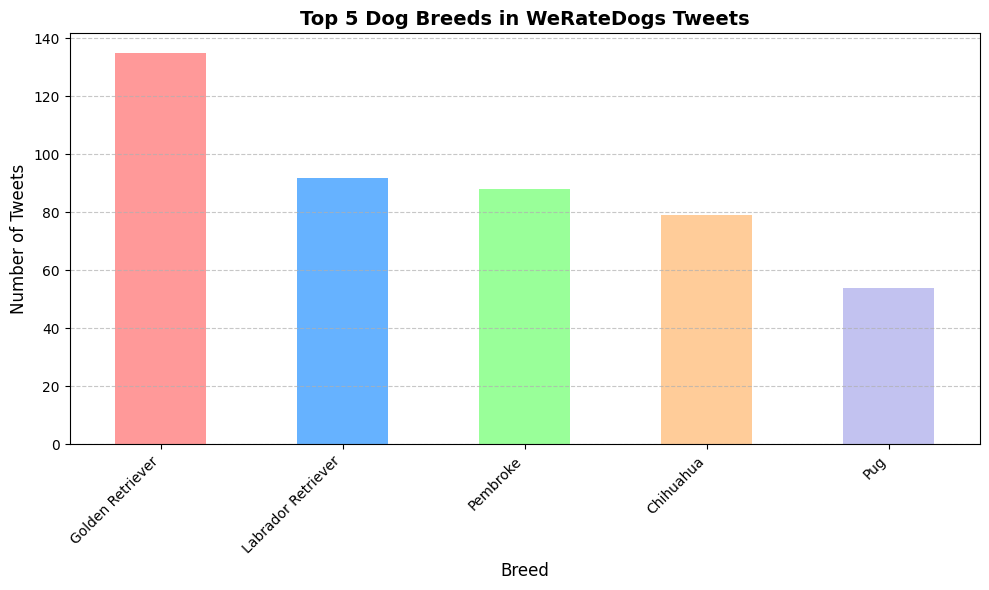

In [91]:
top_breeds.index = top_breeds.index.str.replace('_', ' ')

plt.figure(figsize=(10, 6))
top_breeds.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0'])
plt.title('Top 5 Dog Breeds in WeRateDogs Tweets', fontsize=14, fontweight='bold')
plt.xlabel('Breed', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('top_breeds.png')
plt.show()

## **Final Conclusion**
Key Takeaways:
High Ratings ≠ High Engagement

Despite WeRateDogs' iconic 12/10 ratings, virality is driven by visual appeal and humorous captions, not numerical scores (correlation ≈ 0.01).

Puppers Steal the Spotlight 🐾

"Pupper" (young dogs) dominated tweets (212 mentions), indicating audiences adore puppies more than adult dogs.

Golden Retrievers Rule 🏆

Golden Retrievers were the most-predicted breed (139 tweets), doubling the second-place Labrador Retriever (95 tweets).

Strategic Recommendations:
Focus on Visual Storytelling: Prioritize high-quality, adorable dog photos.

Leverage Humor: Pair images with witty captions to boost shares.

Diversify Content: Showcase less common breeds (e.g., Chihuahuas, Pugs) to attract niche audiences.

Final Insight:
"Cuteness Over Calculus" – While ratings are fun, emotional connections (via visuals and humor) drive Twitter success.

In [92]:
!jupyter nbconvert --to html wrangle_act.ipynb --output wrangle_act.html

[NbConvertApp] Converting notebook wrangle_act.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 480095 bytes to wrangle_act.html
